# GIS with python

Many libraries exist to manipulate geographic information (eg: folium). We will use:
    - leaflet
    - ipyleaflet (the interactive version of leaflet)


## 1 Create a simple interactive map

Let's create our first interactive map:

In [1]:
from ipyleaflet import Map, basemaps
Map()


Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

We can customize the interactive map

In [2]:
latitude = 51.5001524
longitude = -0.1262362
london = (latitude, longitude)
map1 = Map(center = london, basemap=basemaps.Esri.WorldImagery) #save the map as a variable
map1 #display the map

Map(center=[51.5001524, -0.1262362], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

- center: Initial geographic center of the map (default value is (0,0)). A tuple needs to be given with the first element the latitude in degrees (from -90.0 to 90.0) and the second element is the longitude (from -180 to 180).
- zoom: Initial map zoom level (default value is 12)
- max_zoom: maximum value allowed for zooming in (default value is 18)
- min_zoom: minimum value allowed for zooming out (default value is 1)
- basemap: basemap used for ipyleaflet map.  A preview of most of them can be found at https://leaflet-extras.github.io/leaflet-providers/preview/. Use autocompletion to see what's available


**Exercise**: find the GPS coordinates of your home city, and create a map directly centered on it (use services like https://gps-coordinates.net/). Then, change the basemap to OpenTopoMap

## 2 Managing layers

Layers are used to display geographic datasets; the main idea is to have datasets and associated information “separated” into layers.

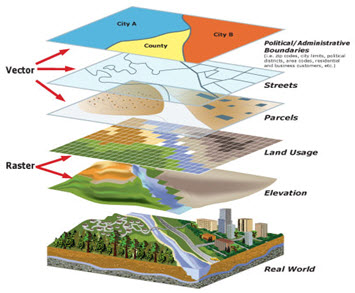

### Raster layers

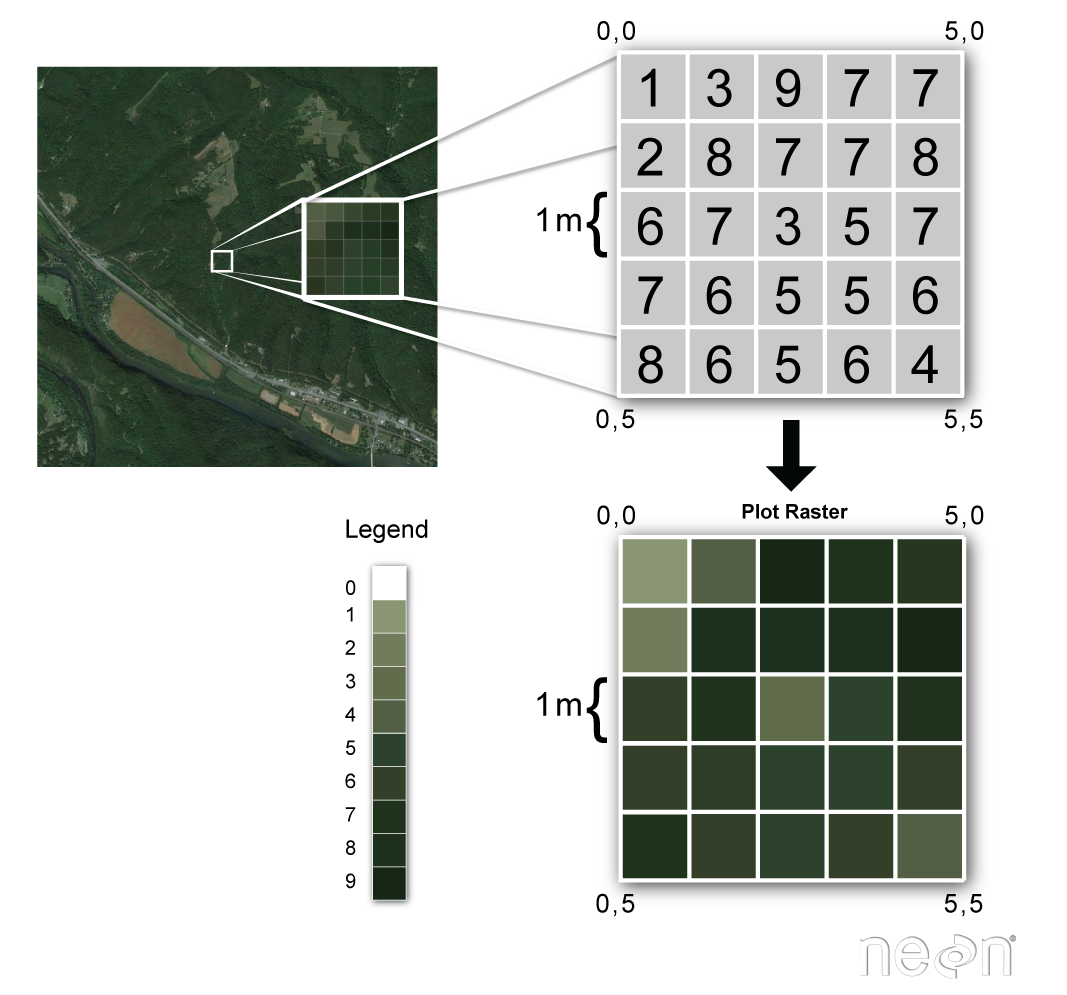


### Vector layers

Similar distinction if you used Adobe Photoshop (bitmap vs vector)
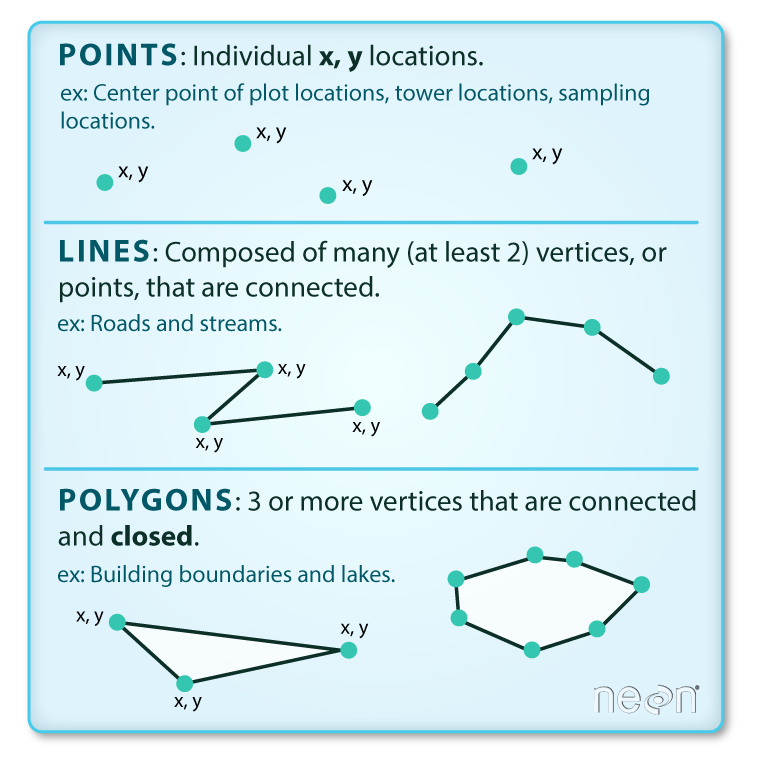

### Adding/removing a layer

Adding or removing layers with ipyleaflet is done using add_layer or remove_layer. A layer is added or removed from an existing ipyleaflet map, and to be able to do so, we store our map into a variable:

In [3]:
from ipyleaflet import basemap_to_tiles

map2 = Map(center = london, basemap=basemaps.Esri.WorldImagery)
nasa_layer = basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR, "2019-06-24");
map2.add_layer(nasa_layer);
map2


Map(center=[51.5001524, -0.1262362], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

As you can see the new layer is on top of the original map, thus hiding the original basemap (when zoomed out, look at the whole country to see the clouds). To be able to control (remove or change its specification), it is important to store it in a variable (here nasa_layer).
To remove a layer :

In [4]:
map2.remove_layer(nasa_layer)
map2 #sync with previous map

Map(center=[51.5001524, -0.1262362], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

### Adding layer control
As we are adding or removing layers from Python interface, it would be nice to have the same functionality from the map itself:

In [5]:
from ipyleaflet import LayersControl
map2.add_control(LayersControl())
map2

Map(center=[51.5001524, -0.1262362], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

**Exercise**: Add a new raster tile layer on the map; for instance overlay the same kind of imagery but for another date.

## 3 Vizualize a raster layer
In this section, we will vizualize a raster layer. Winds (velocity and direction) are usually difficult to represent on a map. ipyleaflet provide a simple way to do it, using Velocity. Velocity requires both:

    U the zonal velocity, i.e. the component of the horizontal (here horizontal means 2D horizontal plane) wind towards east;
    V is the meridional velocity, i.e. the component of the horizontal wind towards north

The meteorological convention for winds is that U component is positive for a west to east flow (eastward wind) and the V component is positive for south to north flow (northward wind).

The raster data we have for winds is in netCDF format, a binary format that is commonly used in environmental sciences such as meteorology, oceanography and climate. Details on this data format is out of scope.

As all raster data, it is gridded data and here we have a regular latitude-longitude grid with 73 latitudes and 144 latitudes. The two variables are:

    u10
    v10

These are the variables we will pass to ipyleaflet to plot winds.

In [6]:
from ipyleaflet import Map, TileLayer, basemaps
from ipyleaflet.velocity import Velocity
import xarray as xr
import os

if not os.path.exists('./data/wind-global.nc'):
  url = 'https://github.com/benbovy/xvelmap/raw/master/notebooks/wind-global.nc'
  import requests
  r = requests.get(url)
  wind_data = r.content
  with open('./data/wind-global.nc', 'wb') as f:
      f.write(wind_data)

center = [0, 0]
zoom = 1
map3 = Map(center=center, zoom=zoom, interpolation='nearest', basemap=basemaps.CartoDB.DarkMatter)

ds = xr.open_dataset('./data/wind-global.nc')
display_options = {
    'velocityType': 'Global Wind',
    'displayPosition': 'bottomleft',
    'displayEmptyString': 'No wind data'
}
wind = Velocity(data=ds,
                zonal_speed='u_wind',
                meridional_speed='v_wind',
                latitude_dimension='lat',
                longitude_dimension='lon',
                velocity_scale=0.01,
                max_velocity=20,
                display_options=display_options)
map3.add_layer(wind)

map3

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [7]:
from ipywidgets.embed import embed_minimal_html
embed_minimal_html('velocity_map.html', views=[map3], title='Velocity map ERA5, 25 December 2018 12:00')

## 4 Custom vector layers

### Add markers and circles

GeoJson is a format of data for geographic information. It can be rendered directly in github. It's a standard format across sectors and programming languages. In this section, we want to plot all instructors from an international school by airport on a map.

In [8]:
import json

with open('data/all_instructors_by_airport.geojson') as f:
    geojson = json.load(f)


In [9]:
from pandas import json_normalize

features = geojson['features']
json_normalize(features) #display data as a table


,type,geometry.type,geometry.coordinates,properties.marker-color,properties.details
0,Feature,Point,"[10.6190004, 56.2999992]",#2b3990,"[BAB, PH, LWJ, AS, KT]"
1,Feature,Point,"[-106.616704, 35.048665]",#2b3990,"[KB, NB, RFB, AF, JMG, CJ, NM, TR, MS, JW]"
2,Feature,Point,"[38.7993011, 8.97789]",#2b3990,"[YA, MDC, YD, YAE, CKK, DYM]"
3,Feature,Point,"[-2.8684399, 56.3728981]",#2b3990,"[IB, AK, PM, MT]"
4,Feature,Point,"[174.791667, -37.008056]",#2b3990,"[EGB, VF, EJ, NJ, CMJT, CM, SS, DS]"
...,...,...,...,...,...
203,Feature,Point,"[-114.012405, 51.128778]",#2b3990,"[PRP, AS]"
204,Feature,Point,"[-123.425833, 48.646944]",#2b3990,[AT]
205,Feature,Point,"[-52.8124826, 47.6211888]",#2b3990,"[IAA, OC, EG, DQ, OS]"
206,Feature,Point,"[-79.630556, 43.677222]",#2b3990,"[SA, BB, MBF, BC, SEC, KC, XF, HG, JG, TG, ARH..."


In [10]:
from ipyleaflet import Map, basemaps, GeoJSON

center = (53.483959, -2.244644)
map4 = Map(center=center, interpolation='nearest', basemap=basemaps.Stamen.Terrain, zoom=5)
geo = GeoJSON(data=geojson)
map4.add_layer(geo)
map4

Map(center=[53.483959, -2.244644], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

### Add popup on click
We added all the instructors locations (nearest airport) on our interactive map but it would be nice to add labels (using available information such as list of instructors):

In [11]:
from ipyleaflet import Marker
from ipywidgets import HTML

features = geojson['features']

map5 = Map(center=center, interpolation='nearest', basemap=basemaps.Stamen.Terrain, zoom=5)
geo = GeoJSON(data=geojson)
map5.add_layer(geo)
for i in range(len(features)):
    location=(features[i]['geometry']['coordinates'][1],features[i]['geometry']['coordinates'][0])
    instructors = features[i]['properties']['details']
    html = """
    <p>
      <h4><b>Instructors</b>:        """ + " ".join(instructors) + """</h4>
    </p>
    """
    marker = Marker(location=location)

    # Popup associated to a layer
    marker.popup = HTML(html)
    map5.add_layer(marker)
map5

Map(center=[53.483959, -2.244644], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

### Marker cluster
The map starts to be a bit messy when we zoom out and our goal now is to cluster (group) markers together

In [12]:
from ipyleaflet import Icon, Marker, MarkerCluster

# First is latitude and second is longitude; both in degrees
center = (53.483959, -2.244644)

zoom = 2
map6 = Map(center=center, interpolation='nearest', zoom = zoom, basemap=basemaps.Stamen.Terrain)

markers = ()
features = geojson['features']
for i in range(len(features)):
    location=(features[i]['geometry']['coordinates'][1],features[i]['geometry']['coordinates'][0])
    instructors = features[i]['properties']['details']
    html = """
    <p>
      <h4><b>Instructors</b>:        """ + " ".join(instructors) + """</h4>
    </p>
    """
    marker = Marker(location=location)

    markers = markers + (marker,)
    # Popup associated to a layer
    marker.popup = HTML(html)

map6.add_layer(MarkerCluster(markers = markers, name='Instructors'))
map6

Map(center=[53.483959, -2.244644], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

### Choropleth maps
A choropleth map is a type of thematic map in which areas (in our example the areas will be countries) are displayed with different colors, shades or patterns which are defined as a function of the plotted parameter. This parameter can be for instance the population density or any statistical quantity


Usually, building a choropleth map is 2-steps:
1. get the data to represent (here unemployment rate in the US), usually it's a homemade data
2. get the geojson data defining the geographic contours (here each state), usually you can find this on the internet
3. find the jointure key between the 2 datasets (here state name), usually the name of the location

In [13]:
import ipyleaflet
import json
import pandas as pd
import os
import requests
from ipywidgets import link, FloatSlider
from branca.colormap import linear

def load_data(url, filename, reading_function):
    r = requests.get(url)
    with open(filename, 'w') as f:
        f.write(r.content.decode("utf-8"))
    with open(filename, 'r') as f:
        return reading_function(f)

In [14]:
unemployment = load_data(
    'https://raw.githubusercontent.com/jupyter-widgets/ipyleaflet/master/examples/US_Unemployment_Oct2012.csv',
    'data/US_Unemployment_Oct2012.csv',
     pd.read_csv)

unemployment

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1
5,CO,7.7
6,CT,8.4
7,DE,7.1
8,FL,8.2
9,GA,8.8


In [15]:
geo_json_data = load_data(
    'https://raw.githubusercontent.com/jupyter-widgets/ipyleaflet/master/examples/us-states.json',
    'data/us-states.json',
     json.load)

geo_json_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 'AL',
   'properties': {'name': 'Alabama'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-87.359296, 35.00118],
      [-85.606675, 34.984749],
      [-85.431413, 34.124869],
      [-85.184951, 32.859696],
      [-85.069935, 32.580372],
      [-84.960397, 32.421541],
      [-85.004212, 32.322956],
      [-84.889196, 32.262709],
      [-85.058981, 32.13674],
      [-85.053504, 32.01077],
      [-85.141136, 31.840985],
      [-85.042551, 31.539753],
      [-85.113751, 31.27686],
      [-85.004212, 31.003013],
      [-85.497137, 30.997536],
      [-87.600282, 30.997536],
      [-87.633143, 30.86609],
      [-87.408589, 30.674397],
      [-87.446927, 30.510088],
      [-87.37025, 30.427934],
      [-87.518128, 30.280057],
      [-87.655051, 30.247195],
      [-87.90699, 30.411504],
      [-87.934375, 30.657966],
      [-88.011052, 30.685351],
      [-88.10416, 30.499135],
      [-88.137022, 30.318396],
    

In [16]:
unemployment =  dict(zip(unemployment['State'].tolist(), unemployment['Unemployment'].tolist()))

layer = ipyleaflet.Choropleth(
    geo_data=geo_json_data,
    choro_data=unemployment,
    colormap=linear.YlOrRd_04,
    border_color='black',
    style={'fillOpacity': 0.8, 'dashArray': '5, 5'})

map7 = ipyleaflet.Map(center = (43,-100), zoom = 4)
map7.add_layer(layer)
map7

Map(center=[43, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [17]:
#add legend

from ipywidgets import widgets
from ipyleaflet import WidgetControl

out = widgets.Output(layout={'border': '1px solid black'})
out.append_stdout('Unemployment rate')
with out:
    display(linear.YlOrRd_04)
widget_control = WidgetControl(widget=out, position='topright')
map7.add_control(widget_control)

In [19]:
from ipywidgets import IntSlider, jslink

zoom_slider = IntSlider(description='Zoom level:', min=0, max=15, value=2)
jslink((zoom_slider, 'value'), (map7, 'zoom'))
widget_control_zoom = WidgetControl(widget=zoom_slider, position='bottomright')
map7.add_control(widget_control_zoom)

source: https://carpentries-incubator.github.io/jupyter_maps/